In [1]:
import torch
import os,sys
import glob
from IPython.display import Image, display
import cv2,argparse

# yolo v5 should be cloned
%cd ./drive/MyDrive/Colab\ Notebooks/yolov5-master/
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")
import detect

/content/drive/MyDrive/Colab Notebooks/yolov5-master
Setup complete. Using torch 1.12.1+cu113 (Tesla T4)


In [2]:
!python train.py --img 640 --batch 16 --epochs 10 --data ../fire_config.yaml --weights yolov5s.pt --workers 1

train: weights=yolov5s.pt, cfg=, data=../fire_config.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=1, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
requirements: YOLOv5 requirements "ipython" "thop>=0.1.1" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 2 packages updated per /content/drive/MyDrive/Colab Notebooks/yolov5-master/requirements.txt
req

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('--weights', nargs='+', type=str,
                        default='runs/train/exp3/weights/best.pt', help='model.pt path(s)')
parser.add_argument('--source', type=str,
                        default='../dataset/fire/val/images/', help='source')
opt, unknown = parser.parse_known_args()

In [3]:
detect.main(opt)

detect: weights=['runs/train/exp3/weights/best.pt'], source=../dataset/fire/val/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 2022-10-12 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/150 /content/drive/MyDrive/Colab Notebooks/dataset/fire/val/images/0.jpg: 480x640 2 fires, 11.1ms
image 2/150 /content/drive/MyDrive/Colab Notebooks/dataset/fire/val/images/0016f8c09384627e.jpg: 480x640 3 fires, 13.9ms
image 3/150 /content/drive/MyDrive/Colab Notebooks/dataset/fire/val/images/004dec94c5de631f.jpg: 480x640 1 fire, 10.2

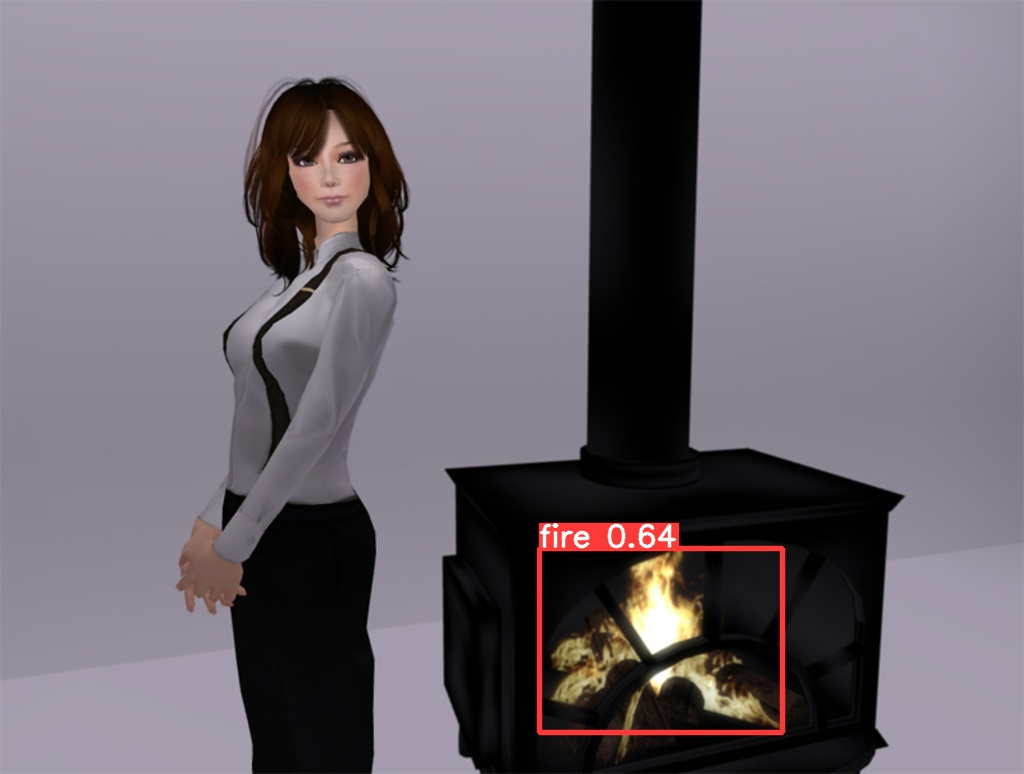

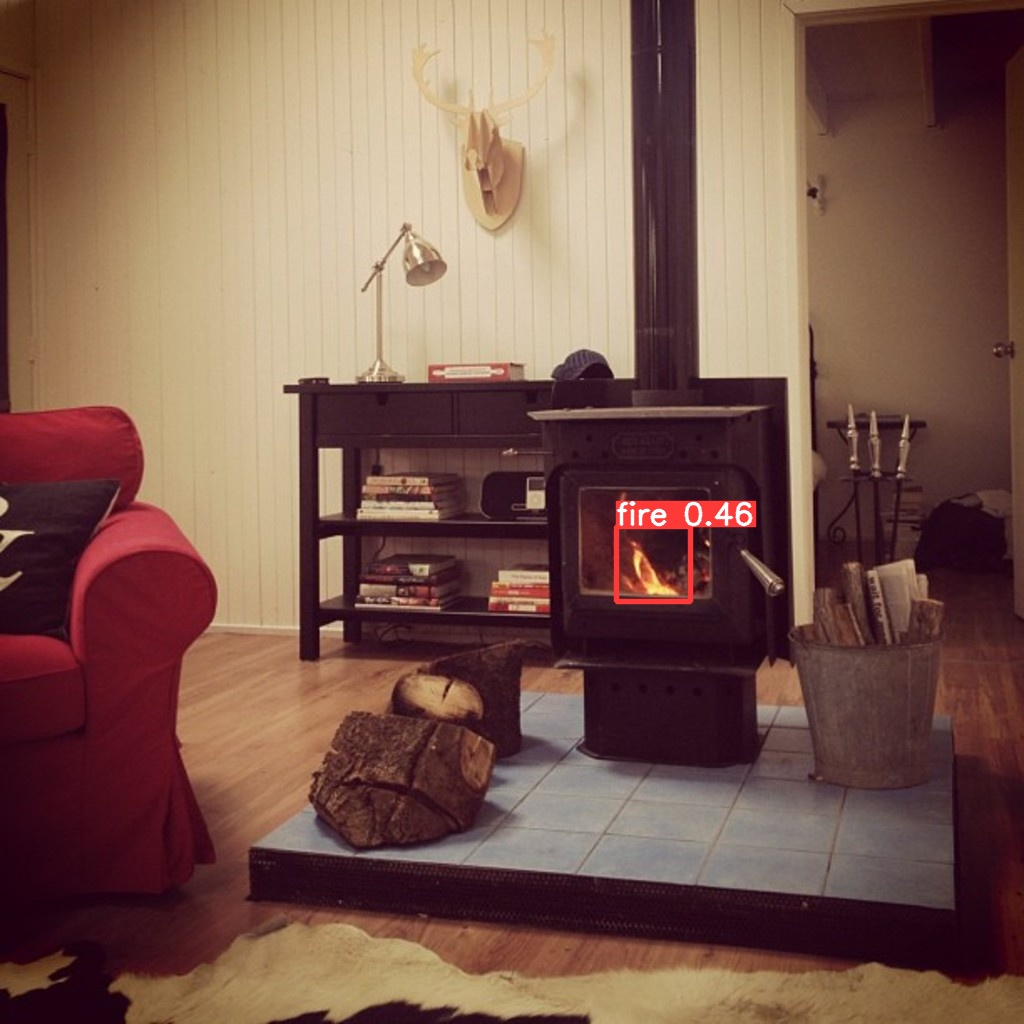

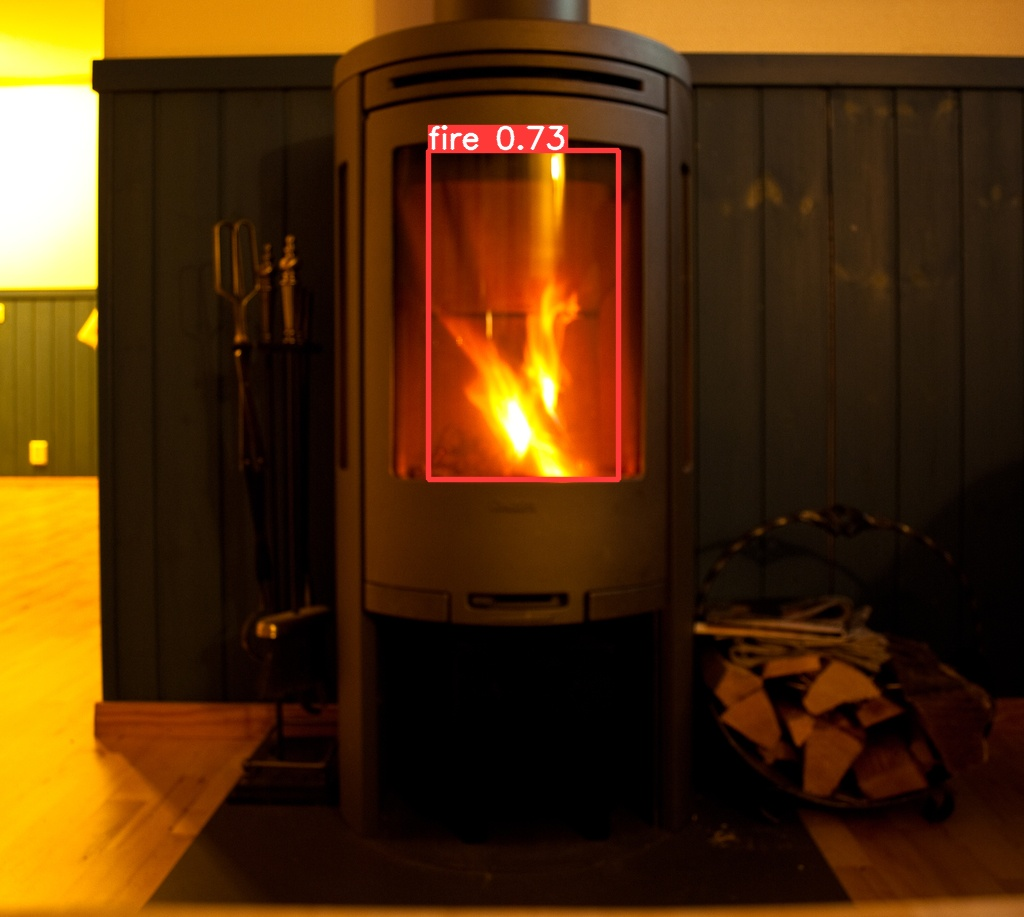

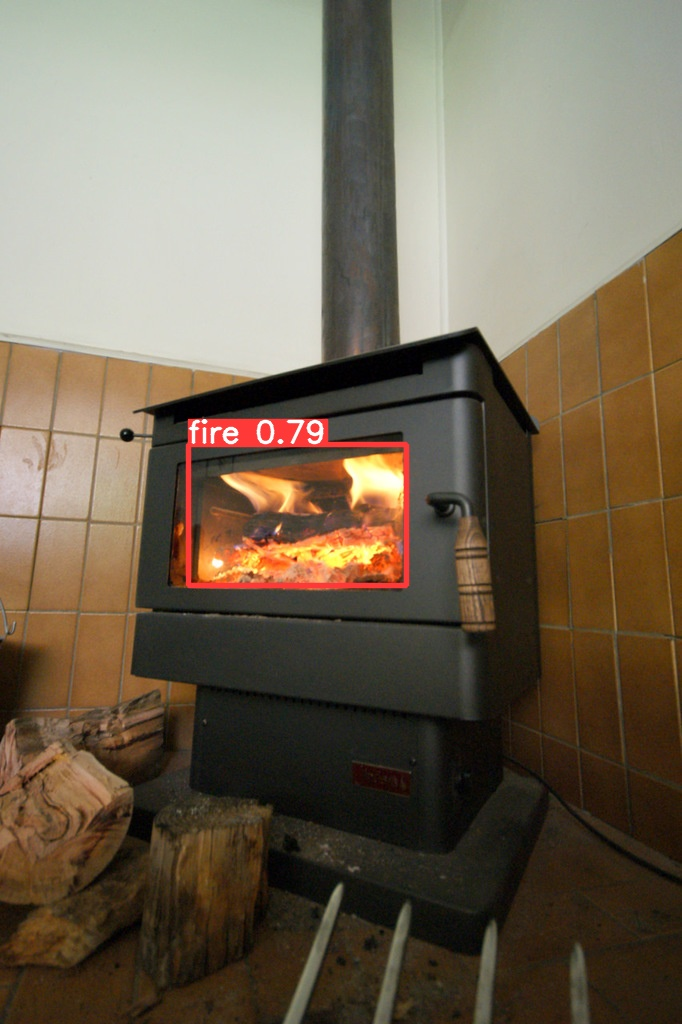

In [9]:
def get_subdirs(b='.'):
    '''
        Returns all sub-directories in a specific Path
    '''
    result = []
    for d in os.listdir(b):
        bd = os.path.join(b, d)
        if os.path.isdir(bd):
            result.append(bd)
    return result
    
def get_detection_folder():
    '''
        Returns the latest folder in a runs\detect
    '''
    return max(get_subdirs(os.path.join('runs', 'detect')), key=os.path.getmtime)
  
showNum=5
count=0
path=get_detection_folder()
for img in os.listdir(path):
  if count<showNum:
    display(Image(filename=path+"/"+img, width=400))
    count=count+1

In [13]:
!pip freeze >my_requirements.txt